<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#HW-for-Week-6:-Read-ch5A" data-toc-modified-id="HW-for-Week-6:-Read-ch5A-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>HW for Week 6: Read ch5A</a></span></li><li><span><a href="#Goodness-of-Fit" data-toc-modified-id="Goodness-of-Fit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Goodness of Fit</a></span></li><li><span><a href="#Computational-Confidence-Estimates" data-toc-modified-id="Computational-Confidence-Estimates-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Computational Confidence Estimates</a></span><ul class="toc-item"><li><span><a href="#Bootstrapping-(Efron-1979)" data-toc-modified-id="Bootstrapping-(Efron-1979)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Bootstrapping (Efron 1979)</a></span></li><li><span><a href="#Jackknifing-(Tukey-1958)-at-N-1" data-toc-modified-id="Jackknifing-(Tukey-1958)-at-N-1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Jackknifing (Tukey 1958) at N-1</a></span></li></ul></li><li><span><a href="#Hypothesis-Testing" data-toc-modified-id="Hypothesis-Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hypothesis Testing</a></span></li><li><span><a href="#Comparison-of-Distributions" data-toc-modified-id="Comparison-of-Distributions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparison of Distributions</a></span><ul class="toc-item"><li><span><a href="#KS-Test" data-toc-modified-id="KS-Test-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>KS Test</a></span></li><li><span><a href="#Parametric-Methods" data-toc-modified-id="Parametric-Methods-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Parametric Methods</a></span></li><li><span><a href="#Nonparametric" data-toc-modified-id="Nonparametric-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Nonparametric</a></span></li></ul></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Histograms</a></span><ul class="toc-item"><li><span><a href="#Scott's-Rule" data-toc-modified-id="Scott's-Rule-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Scott's Rule</a></span></li><li><span><a href="#Freedman-Diaconis-Rule" data-toc-modified-id="Freedman-Diaconis-Rule-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Freedman-Diaconis Rule</a></span></li></ul></li><li><span><a href="#Hack" data-toc-modified-id="Hack-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hack</a></span></li></ul></div>

# HW for Week 6: Read ch5A

# Goodness of Fit
    
    - How good of a fit is our best fit model?
    
    - For Gaussian likelihood, we can write the likelihood:
$$\ln L = C - \frac{1}{2}\chi^2$$

    - This constant is non-trivial, if we are estimating uncertainties on parameters then the constant will include our parameters (e.g, in the case of cosmic variance where the uncertainties are a function of the model)
    
    - This likelihood means that
$2\ln L$ is $\chi^2$ distributed with $N-k$ D.o.F, where $N$ is the number of data points, and $k$ is the number of parameters determined from data.

    - This mostly applies for 'polynomious' models. Non-polynomious models may not span the space of data, and N-k is a lower bound on the D.o.F.
    
    - Typically, expect
$$\chi^2_{dof} \sim \frac{\chi^2}{N-k} \sim 1$$ with stddev $\sqrt{\frac{2}{N-k}}$, see Fig 4.1 for good examples

    - If multiple models (e.g, Gaussian vs Laplace) can compare their L0. But in models with different numbers of parameters, we need a method of penalizing models with "too many" parameters since its unfair to ust compare L0.
    
    - In case of models with different numbers of parameters, define the AIC (Aikake information criterion):
$$AIC = -2 \ln L^0 + 2k + \frac{2k(k+1)}{N-k-1}$$,
and the model with the smallest value of AIC has the least-penalized model.

# Computational Confidence Estimates
    
    - Resample from the observed dataset {xi}, often trying to estimate the true distribution h(x) using distributions f(x) drawn from the data.
    
## Bootstrapping (Efron 1979)

    - Sample your observed data many times, replacing the sampled data and normalize correctly.
$$f(x) = \frac{1}{N}\sum\delta(x-x_i)$$
This gives an estimate on the underlying probability distribution, albeit with larger uncertainty than when taking more data.

## Jackknifing (Tukey 1958) at N-1
    
    - Sample observed data, taking out one point each time.
    
    - Gather all N samples containing N-1 data samples. Calculate
$$\alpha_i^{*}$$ to estimate uncertainties on population value $\alpha$ vs original statistic $\alpha_N$.
    
    - A bias-corrected estimate of the population value is given
$$\alpha^j = \alpha_N + \Delta \alpha$$,
where
$$\Delta \alpha = (N-1)\left(\alpha_N - \frac{1}{N} \sum \alpha_i^*\right)$$
though this estimate fails to correct certain parameters e.g, mean.

    - The uncertainty on $\alpha^J$ is given
$$\sigma_\alpha = \sqrt{\frac{1}{N(N-1)} \sum [N\alpha_N - \alpha^J - (N-1)\alpha_i^*]^2}$$

    - Jackknife confidence limits follow a known distribution -- Student's t-distribution for 
$$t = \frac{\alpha - \alpha^J}{\sigma_\alpha}$$
and $N-1$ DoF

    - Jackknife fails when estimating medians and quantiles, where throwing out an outlier does not effect the sample.
    
    - Bootstrap does not assume asymptotic normality, while Jackknife does, but Jackknife is easier to calculate and automatically removes an estimate of the bias. The best way to choose when approaching a problem is to use both and make sure they give similar results!

# Hypothesis Testing
    
In general we want to reject a null hypothesis, at a significance level $\alpha$, when $p(x > x_i) \leq \alpha$.

Note that failure to reject a null hypothesis does not prove it! Only that it is consistent with a null hypothesis.

Common errors take two forms by the traditional names:

**Type I** - Null hypothesis is incorrectly rejected; false positive, contamination. Can reduce false positives by dropping the significance level / increasing the detection threshold.

**Type II** - Null hypothesis is false but not rejected; false negative, incompleteness. The power of a test is given by (1 - false-negative-probability). Can reduce by increasing significance level / decreasing detection threshold.

**Completeness** - $\eta = \frac{n_{true} - n_{missed}}{n_{true}}$

**Contamination** - $\epsilon = \frac{n_{spurious}}{n_{source}}$

Fig 4.5 gives a simplified example of classification of sources vs background in source detection.

# Comparison of Distributions

**Regression toward the Mean** - "Measurements very different from the mean will tend toward the mean on repeated measurements."

For unknown distributions, should use nonparameteric (distribution-free) tests to compare distributions where we don't know how many parameters (or which parameters) go into the model. The most common such test is the Kolmogorov-Smirnov (KS) test.

## KS Test

Compares F(X) of 2 samples using their maximum distance
$$D = \max|F_1(x_1) - F_2(x_2)|$$
This maximum distance is then turned into (using a lookup table) a significance that a null hypothesis of "drawn from the same distribution" can be rejected (be careful of saying "consistent at some significance level," this is not correct!)

There exists a one-sample KS test, with the hypothesis that f(x) is drawn from a reference distribution h(x). This is different in that only one distribution contains Poisson uncertainties, and the distance defined above may be underesimated.

In the case of testing for Gaussianity, KS test is not the best since it is insensitive to the tails of the distribution. The KS test has troubles with CDFs near $x_{min}$ and $x_{max}$, where the distances go to zero. The Anderson-Darling test is more sensitive to the tails of the distribution

KS test is not well-defined for more dimensions than 1, but we can calculate 2D CDFs to create a 2D KS-like-test, see Section 4.7.3

## Parametric Methods

Iff we assuming the underlying distribution is Gaussian, there exist standard tests for comparing means and variances of 2 samples. It's not clear that such standard tests are significantly better than nonparametric tests, and in general nonparametric techniques are preferred.

We can compare means while assuming both have sime true $\sigma$: t-test using (4.71-4.73). The difference in the sample means obeys Student's t-distribution, with $N_{DoF} = N_1 + N_2 - 2$.

We can also compare means without assuming same $\sigma$: Welch's t-test.

We can compare variances of two distributions: null hypothesis is $\sigma_1 = \sigma_2$, and we assess using an F-test with
$$F = \frac{s_1^2}{s_2^2}$$ which follows Fisher's F-distribution with $d_1 = N_1 - 1$, $d_2 = N_2 - 1$.

## Nonparametric

**Nonparametric** - Distribution-free, or independent of the number of parameters in the distribution. It can still have a variable number of parameters. Formally,
$$f(x) \to h(x)$$ as $N_{data} \to \infty$.

# Histograms

How do we choose the number of bins, or bin-widths. In general, people adjust the histogram bins until it "looks good". But there are optimal ways of deciding on our histogram parameters!

## Scott's Rule

Equation (4.78)
$$\Delta_b = \frac{3.5\sigma}{N^{1/3}}$$
where $\sigma$ is the sample standard deviation and $N$ is the sample size. This minimizes the MISE for an underlying Gaussian distribution. There's an optimum number of bins in the first place because we are really optimizing the amount of Poisson fluctuations against the number of data points.

## Freedman-Diaconis Rule

In the case of non-Gaussian distributions,
$$\Delta_b = \frac{2\left(q_{75} - q_{25}\right)}{N^{1/3}} = \frac{2.7 \sigma_G}{N^{1/3}}$$

# Hack

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats import fit_bivariate_normal
from astroML.stats.random import bivariate_normal

In [84]:
def compute_results(N, Nbootstraps):
    ''' Bootstrap method of calculating Kendall-tau correlation coefficient
    '''
    results = np.zeros((1, 3, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out, X_out2]):
            x = data[ind, 0]
            y = data[ind, 1]
            results[0, j, k] = stats.kendalltau(x, y)[0]

    return results

In [85]:
N = 1000

sigma1 = 2.0
sigma2 = 1.0
mu = [10, 10]
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.01
f2 = 0.10

np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

In [86]:
X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5, 45 * np.pi / 180., int(f * N))
X_out2 = X.copy()
X_out2[:int(f2 * N)] = bivariate_normal(mu, 2, 5, 45 * np.pi / 180., int(f2 * N))

tau_true = 2 / np.pi * np.arcsin(rho_true)

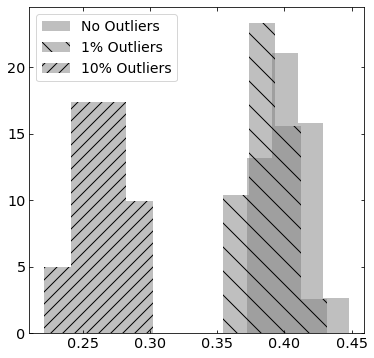

In [119]:
Nbootstraps = 20
results = compute_results(N, Nbootstraps)

fig, ax = plt.subplots(1,1, figsize=(6,6))

pct = '%'
histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.5, label='%i%s Outliers' % (int(f * 100), pct), hatch='\\'),
            dict(alpha=0.5, label='%i%s Outliers' % (int(f2 * 100), pct), hatch='//'))

for j in range(3):
    ax.hist(results[0, j], bins='scott', histtype='stepfilled', fc='gray',
            normed=True, **histargs[j])
    
ax.legend(loc=2, fontsize=14)

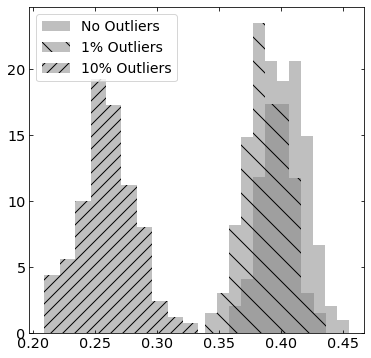

In [112]:
Nbootstraps = 200
results = compute_results(N, Nbootstraps)

fig, ax = plt.subplots(1,1, figsize=(6,6))

pct = '%'
histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.5, label='%i%s Outliers' % (int(f * 100), pct), hatch='\\'),
            dict(alpha=0.5, label='%i%s Outliers' % (int(f2 * 100), pct), hatch='//'))

for j in range(3):
    ax.hist(results[0, j], bins='scott', histtype='stepfilled', fc='gray',
            normed=True, **histargs[j])
    
ax.legend(loc=2, fontsize=14)

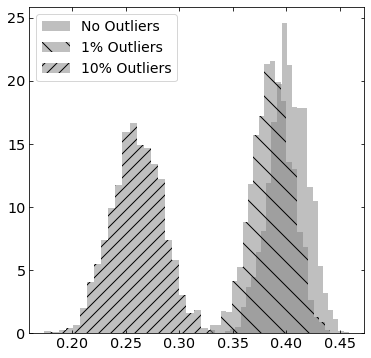

In [113]:
Nbootstraps = 2000
results = compute_results(N, Nbootstraps)

fig, ax = plt.subplots(1,1, figsize=(6,6))

pct = '%'
histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.5, label='%i%s Outliers' % (int(f * 100), pct), hatch='\\'),
            dict(alpha=0.5, label='%i%s Outliers' % (int(f2 * 100), pct), hatch='//'))

for j in range(3):
    ax.hist(results[0, j], bins='scott', histtype='stepfilled', fc='gray',
            normed=True, **histargs[j])
    
ax.legend(loc=2, fontsize=14)